In [2]:
import networkit as nk
from networkit import nxadapter
import pandas as pd
import networkx as nx
%matplotlib inline
import matplotlib.pyplot as plt

from GraphRicciCurvature.FormanRicci import FormanRicci
from GraphRicciCurvature.OllivierRicci import OllivierRicci

# tasks
1) compute and compare ORC on graph with edge weights computed by node features vs. without
2) expand calculation #hop nbrs
3) can you show that x hops is enough for global structure?
4) compare with resistance curvature

# cora ORC edge weight comparison

In [4]:
import os
os.getcwd()

'/Users/nicolexing/Documents/GitHub/GraphRicciCurvature'

In [5]:
cora = nx.read_gexf("/Users/nicolexing/Documents/GitHub/GraphRicciCurvature/data/cora_rf_sinkhorn_e2_20.gexf", node_type=None, relabel=False, version='1.2draft')
print(cora.number_of_edges())
print(cora.number_of_nodes())

5069
2485


the above cora comes with precomputed ricci curvature

In [17]:
cora.edges(data=True)

EdgeDataView([('74700', '23069', {'ricciCurvature': -0.09055979874674813, 'original_RC': 7.781024178310503e-07, 'id': '0', 'weight': 0.16980723753665147}), ('74700', '134307', {'ricciCurvature': -0.09142913152972798, 'original_RC': -6.701576601786385e-05, 'id': '1', 'weight': 0.303447956272575}), ('684986', '684972', {'ricciCurvature': -0.08102536514260028, 'original_RC': 0.33054615059788206, 'id': '2', 'weight': 0.07311672541602887}), ('684986', '395553', {'ricciCurvature': -0.08724230597492855, 'original_RC': 0.24797210480849885, 'id': '3', 'weight': 0.16085391798926976}), ('684986', '4330', {'ricciCurvature': -0.10513598588133877, 'original_RC': -0.4375042430640179, 'id': '4', 'weight': 2.0330851725734043}), ('127940', '1114364', {'ricciCurvature': -0.16934001450457736, 'original_RC': 0.24999999931299322, 'id': '5', 'weight': 0.06479661118099896}), ('127940', '243274', {'ricciCurvature': -0.16934001450457736, 'original_RC': 0.24999999931299322, 'id': '6', 'weight': 0.064796611180998

In [16]:
df = pd.DataFrame.from_dict(dict(cora.nodes(data=True)), orient='index')
df.head()

,class,ricciCurvature,label
74700,Probabilistic_Methods,-0.090994,74700
684986,Neural_Networks,-0.091135,684986
127940,Neural_Networks,-0.168372,127940
686015,Neural_Networks,-0.093442,686015
23448,Neural_Networks,-0.076272,23448


In [7]:
cora.edges()

EdgeView([('74700', '23069'), ('74700', '134307'), ('684986', '684972'), ('684986', '395553'), ('684986', '4330'), ('127940', '1114364'), ('127940', '243274'), ('127940', '416964'), ('127940', '430329'), ('686015', '27623'), ('686015', '75674'), ('686015', '27627'), ('686015', '28254'), ('23448', '19621'), ('23448', '1365'), ('23448', '123825'), ('131117', '400473'), ('131117', '29492'), ('131117', '152219'), ('131117', '212930'), ('144330', '63486'), ('144330', '22431'), ('144330', '20193'), ('1121867', '8079'), ('1121867', '5055'), ('1121867', '154982'), ('1121867', '59045'), ('1121867', '2654'), ('1105505', '66794'), ('1105505', '66782'), ('103543', '126926'), ('103543', '126927'), ('103543', '126912'), ('103543', '126920'), ('103543', '126909'), ('1104055', '2653'), ('1104055', '3243'), ('1104055', '36140'), ('1104055', '36145'), ('469504', '2696'), ('469504', '43639'), ('469504', '330208'), ('35852', '486840'), ('35852', '1113438'), ('35852', '41732'), ('35852', '1035'), ('193918'

In [8]:
def show_results(G, curvature="ricciCurvature"):

    # Print the first five results
    print("cora, first 5 edges: ")
    for n1,n2 in list(G.edges())[:5]:
        print("Ricci curvature of edge (%s,%s) is %f" % (n1 ,n2, G[n1][n2][curvature]))

    # Plot the histogram of Ricci curvatures
    plt.subplot(2, 1, 1)
    ricci_curvtures = nx.get_edge_attributes(G, curvature).values()
    plt.hist(ricci_curvtures,bins=20)
    plt.xlabel('Ricci curvature')
    plt.title("Histogram of Ricci Curvatures (cora)")

    # Plot the histogram of edge weights
    plt.subplot(2, 1, 2)
    weights = nx.get_edge_attributes(G, "weight").values()
    plt.hist(weights,bins=20)
    plt.xlabel('Edge weight')
    plt.title("Histogram of Edge weights (cora)")

    plt.tight_layout()

view the orc and frc for edges computed by default weight in graph

cora, first 5 edges: 
Ricci curvature of edge (74700,23069) is -0.082299
Ricci curvature of edge (74700,134307) is -0.053479
Ricci curvature of edge (684986,684972) is 0.209002
Ricci curvature of edge (684986,395553) is -0.009250
Ricci curvature of edge (684986,4330) is -0.105087


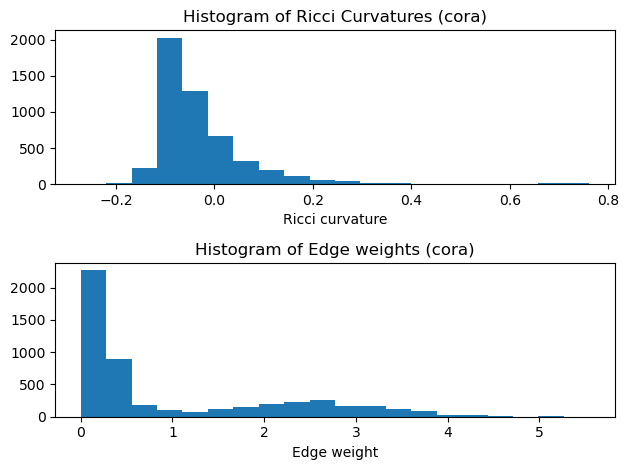

In [9]:
# compute the Ollivier-Ricci curvature of the given graph G
orc = OllivierRicci(cora, alpha=0.5, verbose="INFO")
orc.compute_ricci_curvature()
cora_orc = orc.G.copy()  # save an intermediate result
show_results(cora_orc)


cora, first 5 edges: 
Ricci curvature of edge (74700,23069) is -1.649498
Ricci curvature of edge (74700,134307) is -5.232272
Ricci curvature of edge (684986,684972) is 1.082457
Ricci curvature of edge (684986,395553) is -0.222828
Ricci curvature of edge (684986,4330) is -47.510357


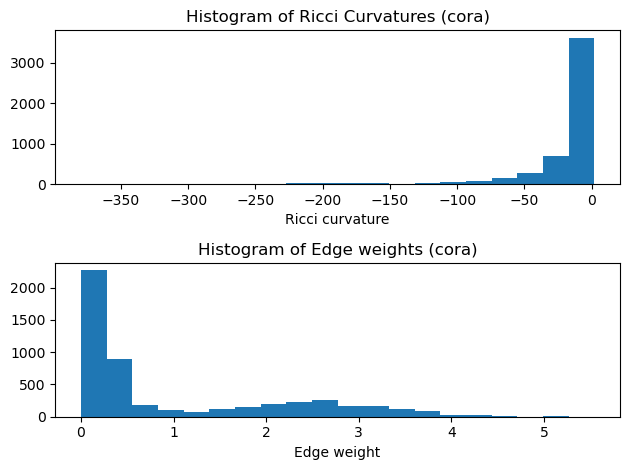

In [13]:
# forman ricci
frc = FormanRicci(cora, verbose="TRACE")
frc.compute_ricci_curvature()
cora_frc = frc.G.copy()
show_results(cora_frc, curvature='formanCurvature')

view the orc and frc for edge weight computed by node similarity

In [14]:
for n1,n2 in list(cora.edges())[:5]:
    print(cora.get_edge_data(n1,n2))

{'ricciCurvature': -0.09055979874674813, 'original_RC': 7.781024178310503e-07, 'id': '0', 'weight': 0.16980723753665147}
{'ricciCurvature': -0.09142913152972798, 'original_RC': -6.701576601786385e-05, 'id': '1', 'weight': 0.303447956272575}
{'ricciCurvature': -0.08102536514260028, 'original_RC': 0.33054615059788206, 'id': '2', 'weight': 0.07311672541602887}
{'ricciCurvature': -0.08724230597492855, 'original_RC': 0.24797210480849885, 'id': '3', 'weight': 0.16085391798926976}
{'ricciCurvature': -0.10513598588133877, 'original_RC': -0.4375042430640179, 'id': '4', 'weight': 2.0330851725734043}
